<div style="display: flex; background-color: RGB(200,150,100);" >
  <h1 style="margin: auto; padding: 20px; "> Projet: ANALYSE DES VENTES ! </h1>
</div>

### Sommaire
###  <a href="#AF"> 1. Chargement et fusion des fichiers de ventes </a>
###  <a href="#F"> 2. Analyse de la forme </a>
###  <a href="#FA"> 3. Analyse du fond </a>

<div style="border: 1px solid RGB(200,150,100);" >
    Nous allons nous baser des données des ventes mensuelles d'une société de smartphone et gadgets pour essayer de répondre aux questions suivantes :
    <ul>
        <li> Quel est le mois durant lequel l'entreprise a réalisé le meilleur CA? </li>
        <li> Dans quelle ville l'entreprise enregistre le plus de commandes ? </li>
        <li> En quel moment est ce qu'il faut faire une campagne publicitaire pour avoir le plus de clients ? </li>
        <li> Quel est le produit le plus vendu ? </li>
    </ul>
</div>

In [35]:
# importation des packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="border: 1px solid RGB(200,150,100);" >
    <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> <a id="AF"> 1 - Chargement et fusion des fichiers de ventes </a></h3>
</div>

In [9]:
# creation de la liste des fichiers des ventes a partie de leur localisation
files = [file for file in os.listdir(r'C:\Users\DELL LATITUDE 7470\Desktop\Formation\Analyse des Ventes\Sales_Data')] 

In [10]:
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [31]:
# Concatenation des fichiers pour obtenir un seul Dataset des ventes pour les 12 mois de l'annee 2019

path = r'C:\Users\DELL LATITUDE 7470\Desktop\Formation\Analyse des Ventes\Sales_Data'
all_data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path+'/'+file)
    all_data = pd.concat([all_data, current_data])
print(all_data)
    

      Order ID                     Product Quantity Ordered Price Each  \
0       176558        USB-C Charging Cable                2      11.95   
1          NaN                         NaN              NaN        NaN   
2       176559  Bose SoundSport Headphones                1      99.99   
3       176560                Google Phone                1        600   
4       176560            Wired Headphones                1      11.99   
...        ...                         ...              ...        ...   
11681   259353      AAA Batteries (4-pack)                3       2.99   
11682   259354                      iPhone                1        700   
11683   259355                      iPhone                1        700   
11684   259356      34in Ultrawide Monitor                1     379.99   
11685   259357        USB-C Charging Cable                1      11.95   

           Order Date                         Purchase Address  
0      04/19/19 08:46             917 1st St, 

In [23]:
# Enregistrement du fichier obtenu

all_data.to_csv(r'C:\Users\DELL LATITUDE 7470\Desktop\Formation\Analyse des Ventes\all_data.csv', index=False)

<div style="border: 1px solid RGB(200,150,100);" >
    <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> <a id="F"> 2 - Analyse de la forme du fichier </a></h3>
</div>

In [25]:
all_data.shape

(186850, 6)

In [26]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [27]:
# les types de variables contenu dans les donnees
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

<AxesSubplot:>

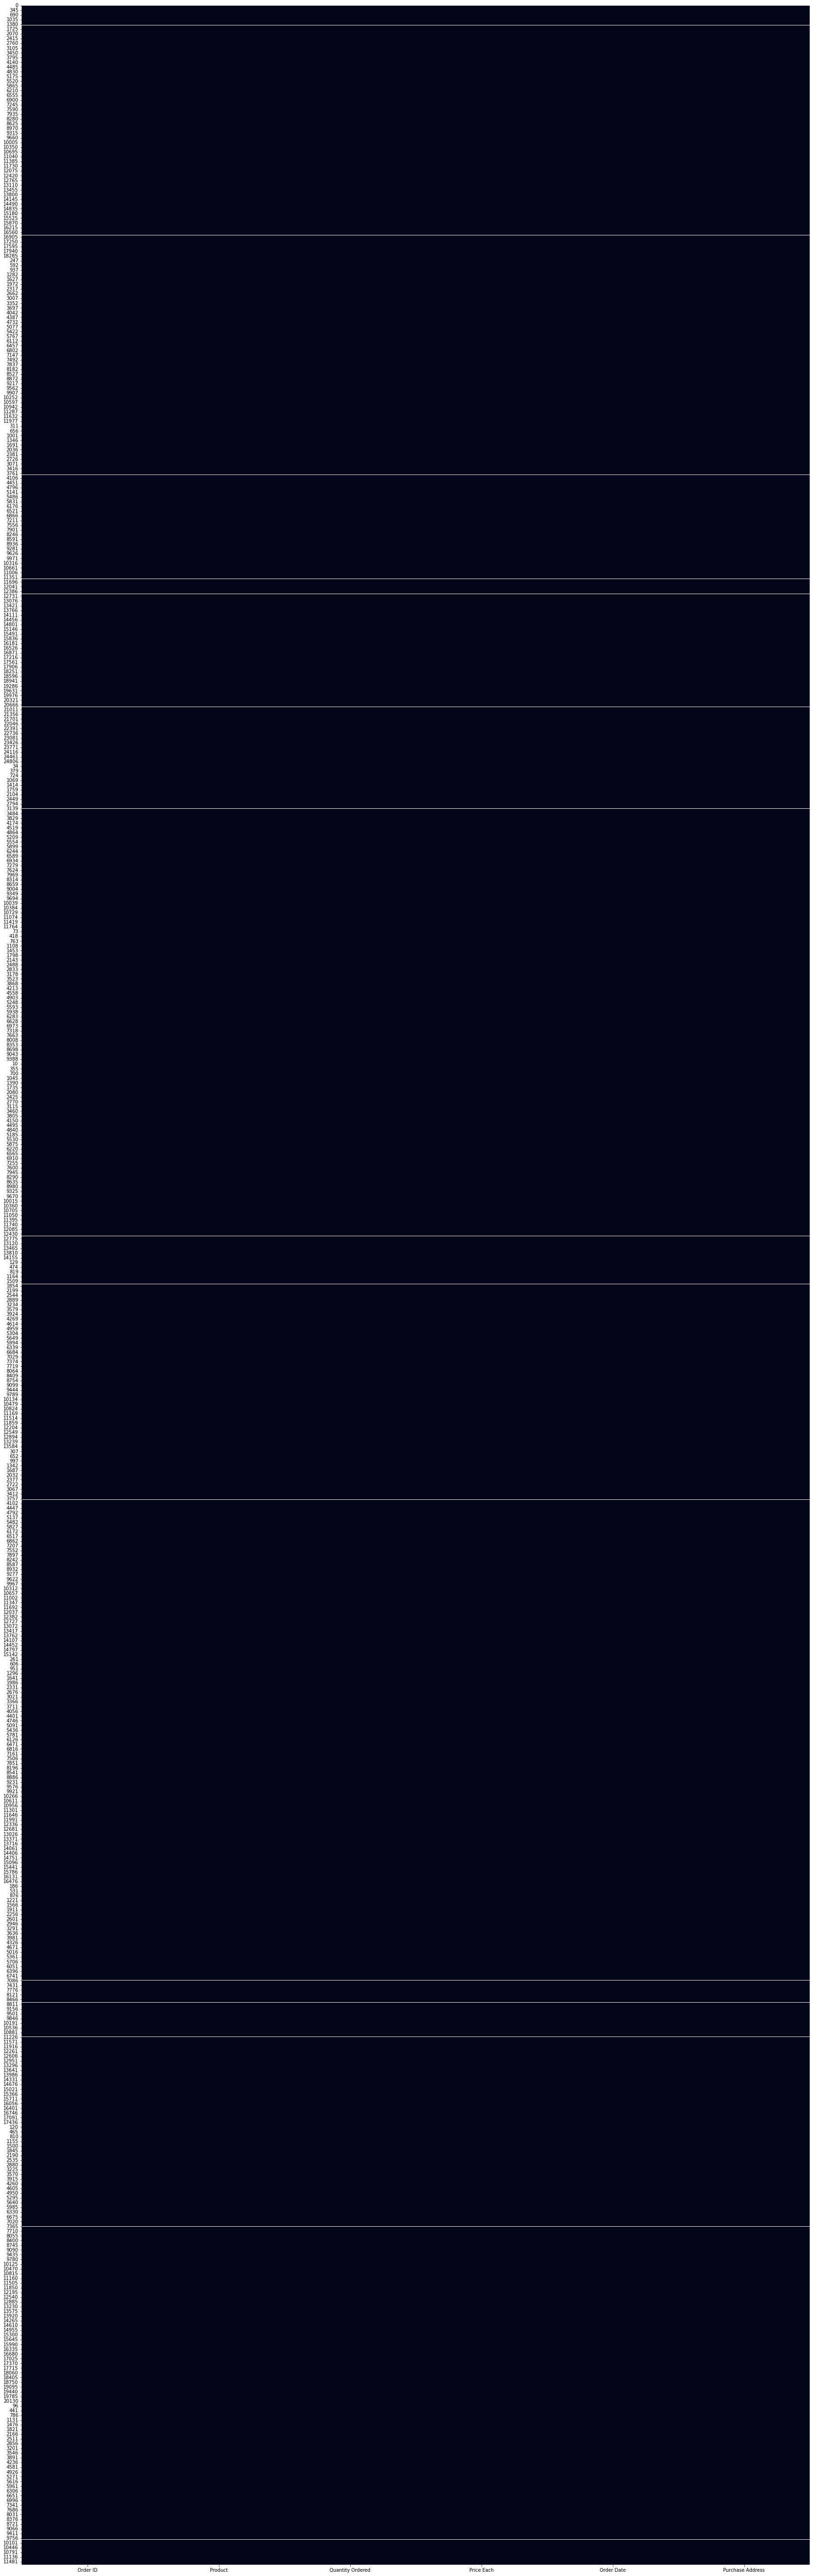

In [39]:
# Visualisation graphique des valeurs manquantes (nan)
plt.figure(figsize=(30,100))
sns.heatmap(all_data.isna(), cbar = False)

In [28]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [29]:
# Suppression des nan
all_data= all_data.dropna(how='all')

In [30]:
all_data.shape

(186305, 6)

In [32]:
dataset= all_data.copy()

In [48]:
dataset= dataset.dropna(how='all')

In [49]:
dataset.head()

,Order ID,Nom_Produit,Quantite,Prix,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [50]:
dataset= dataset.rename(columns = {'Product': 'Nom_Produit', 'Quantity Ordered': 'Quantite', 'Price Each':'Prix'})

In [54]:
dataset.head()

,Order ID,Nom_Produit,Quantite,Prix,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


<div style="border: 1px solid RGB(200,150,100);" >
    <h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> <a id="FA"> 3 - Analyse du fond </a></h3>
</div>

### Mois ayant le meilleur CA

In [73]:
def month(x):
    return x.split('/')[0]

In [74]:
# Ajout de la variable qui stock le mois de l'annee
dataset['Mois']=dataset['Order Date'].apply(month)

In [75]:
dataset

,Order ID,Nom_Produit,Quantite,Prix,Order Date,Purchase Address,Mois
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [76]:
dataset['Mois'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [77]:
dataset = dataset[dataset['Mois']!='Order Date']

In [79]:
dataset

,Order ID,Nom_Produit,Quantite,Prix,Order Date,Purchase Address,Mois
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [80]:
dataset=dataset.astype({'Quantite': int, 'Prix': float, 'Mois': int})

In [81]:
dataset.dtypes

Order ID             object
Nom_Produit          object
Quantite              int32
Prix                float64
Order Date           object
Purchase Address     object
Mois                  int32
dtype: object

In [82]:
# Creation de la colonne Ventes
dataset['Ventes']= dataset['Quantite']*dataset['Prix']

In [84]:
# Calcul du CA mensuel
dataset.groupby('Mois')['Ventes'].sum()

Mois
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Ventes, dtype: float64

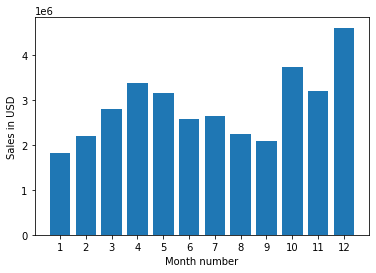

In [86]:
Mois=range(1, 13)
plt.bar(Mois, dataset.groupby('Mois')['Ventes'].sum())
plt.xticks(Mois)
plt.ylabel('Sales in USD')
plt.xlabel('Month number')
plt.show()

### Ville ayant realise le plus de vente

In [87]:
# Extraction de ville dans l'addresse
def city(x):
    return x.split(',')[1]

In [88]:
dataset['Ville']= dataset['Purchase Address'].apply(city)

In [89]:
dataset

,Order ID,Nom_Produit,Quantite,Prix,Order Date,Purchase Address,Mois,Ventes,Ville
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [90]:
dataset.groupby('Ville')['Ville'].count()

Ville
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: Ville, dtype: int64

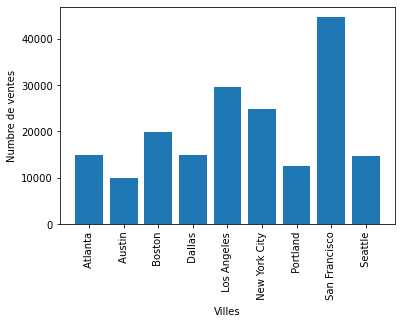

In [92]:
Villes=dataset.groupby('Ville')['Ville'].count().index
plt.bar(Villes, dataset.groupby('Ville')['Ville'].count())
plt.xticks(rotation='vertical')
plt.ylabel('Numbre de ventes')
plt.xlabel('Villes')
plt.show()